In [189]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [190]:
data = pd.read_csv('monthly-milk-production.csv', sep=';')

In [191]:
data.head()

,month,milk
0,01.01.1962,589
1,01.02.1962,561
2,01.03.1962,640
3,01.04.1962,656
4,01.05.1962,727


## Task 6

In [192]:
date = data['month'].str.split('.')
date.head()

0    [01, 01, 1962]
1    [01, 02, 1962]
2    [01, 03, 1962]
3    [01, 04, 1962]
4    [01, 05, 1962]
Name: month, dtype: object

In [197]:
monthes = [date[i][1] for i in range(data.shape[0])]

monthes = map(int, monthes)
monthes[:5]

[1, 2, 3, 4, 5]

In [200]:
years = [date[i][2] for i in range(data.shape[0])]

years = map(int, years)
years[:5]

[1962, 1962, 1962, 1962, 1962]

In [202]:
dim = []

for year, month in zip(years, monthes):
    dim.append(monthrange(year,month)[1])

In [207]:
from calendar import monthrange
dim = [monthrange(year, month)[1] for year, month in zip(years, monthes)]

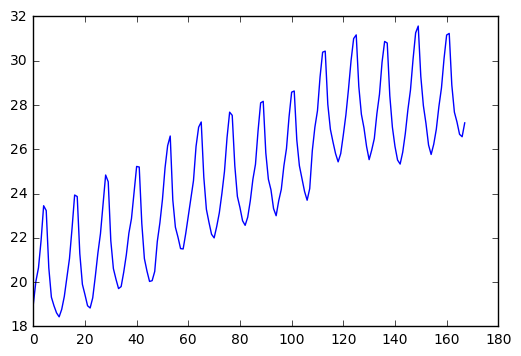

In [211]:
pylab.plot(data.milk/dim)

## Task 7

In [224]:
data['daily_diff1'] = data.milk - data.milk.shift(1)

In [225]:
data.head()

,month,milk,daily_diff1
0,01.01.1962,589,NaN
1,01.02.1962,561,-28.0
2,01.03.1962,640,79.0
3,01.04.1962,656,16.0
4,01.05.1962,727,71.0


In [240]:
data['daily_diff12'] = data.milk - data.milk.shift(12)
data['daily_diff121'] = data.daily_diff12 - data.daily_diff12.shift(1)

In [243]:
data.head(20)

,month,milk,daily_diff1,daily_diff12,daily_diff121
0,01.01.1962,589,NaN,NaN,NaN
1,01.02.1962,561,-28.0,NaN,NaN
2,01.03.1962,640,79.0,NaN,NaN
3,01.04.1962,656,16.0,NaN,NaN
4,01.05.1962,727,71.0,NaN,NaN
5,01.06.1962,697,-30.0,NaN,NaN
6,01.07.1962,640,-57.0,NaN,NaN
7,01.08.1962,599,-41.0,NaN,NaN
8,01.09.1962,568,-31.0,NaN,NaN
9,01.10.1962,577,9.0,NaN,NaN


In [248]:
import statsmodels.api as sm
result_milk = sm.tsa.stattools.adfuller(data.milk)
result_diff1 = sm.tsa.stattools.adfuller(data.daily_diff1[1:])
result_diff12 = sm.tsa.stattools.adfuller(data.daily_diff12[12:])
result_diff121 = sm.tsa.stattools.adfuller(data.daily_diff121[13:])

print result_milk[1]
print result_diff1[1]
print result_diff12[1]
print result_diff121[1]

0.627426708603
0.0300680040018
0.160798805277
1.86542343188e-05


## Task 8

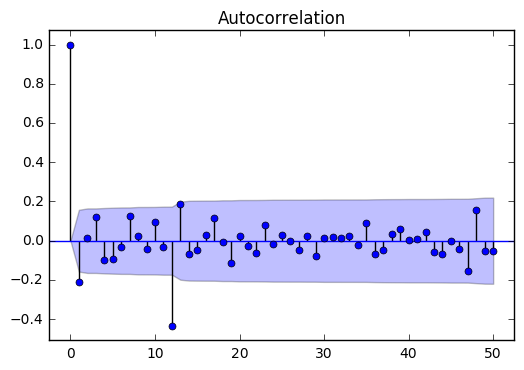

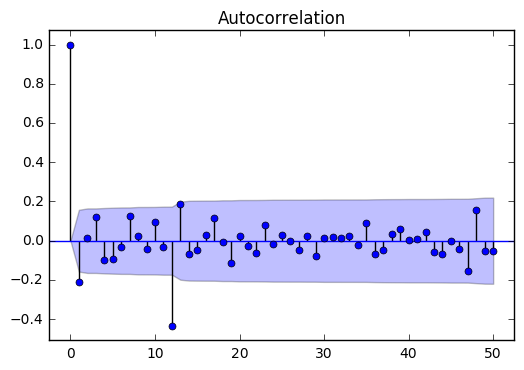

In [249]:
sm.graphics.tsa.plot_acf(data.daily_diff121[13:].values.squeeze(), lags=50)

In [252]:
1

1

## Task 9

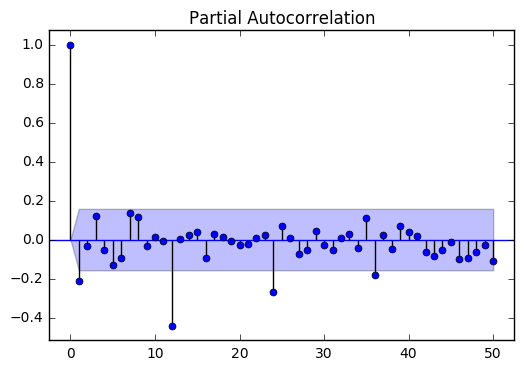

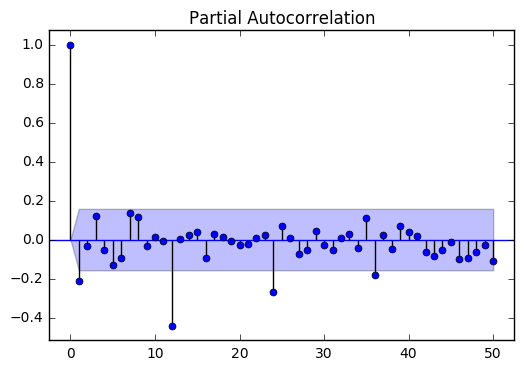

In [250]:
sm.graphics.tsa.plot_pacf(data.daily_diff121[13:].values.squeeze(), lags=50)

In [253]:
0

0